## Principle Component Analysis

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib notebook
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap
from random import randint
import sklearn
print (sklearn.__version__) 

0.20.4


Here, we only explore WeightofEvidence_encoding.csv
https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe

In [55]:
os.getcwd()

data_directory = os.path.join(
    '/Users/niloofarzarifi/Desktop/Udacity/khaneh/Watson-IBM-customer/MTC-PYTHON-PROJECT')
#data = pd.read_csv(os.path.join(data_directory, "label_encoding.csv"))
#data = pd.read_csv(os.path.join(data_directory, "mean_label_encoding.csv"))
data = pd.read_csv(os.path.join(data_directory, "WeightofEvidence_encoding.csv"))

In [56]:
from sklearn.preprocessing import StandardScaler

# Separating out the features and target
y = data['Response'] 
X = data.drop(['Response'], axis = 1)

# Standardizing the features
X = StandardScaler().fit_transform(X)

n_components for this dataset is between 1 and 21 dimensions since we have 21 features. putting all attributes in the same unit of measurement (the range between 0 and 1), will improve the maximization of the variance for each component that our PCA needs to perform its matrix operations in the best way.

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=21)
principalComponents = pca.fit_transform(X)

# calculate the explained variance for each attribute
#the goal is choosing max variance. for example if we want 2Ds we choose 0.11058 and 0.07245519
pca.explained_variance_ratio_

array([ 0.1105802 ,  0.07245519,  0.06911288,  0.05640775,  0.0522736 ,
        0.05038637,  0.04964632,  0.04914973,  0.04791198,  0.04768756,
        0.04748121,  0.04648956,  0.04606318,  0.04382844,  0.04245717,
        0.04004239,  0.0390625 ,  0.03140526,  0.02628483,  0.02297752,
        0.00829636])

This plot tells us that selecting 17 or 18 components we can preserve something around 94% or 96% of the total variance of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.

<IPython.core.display.Javascript object>


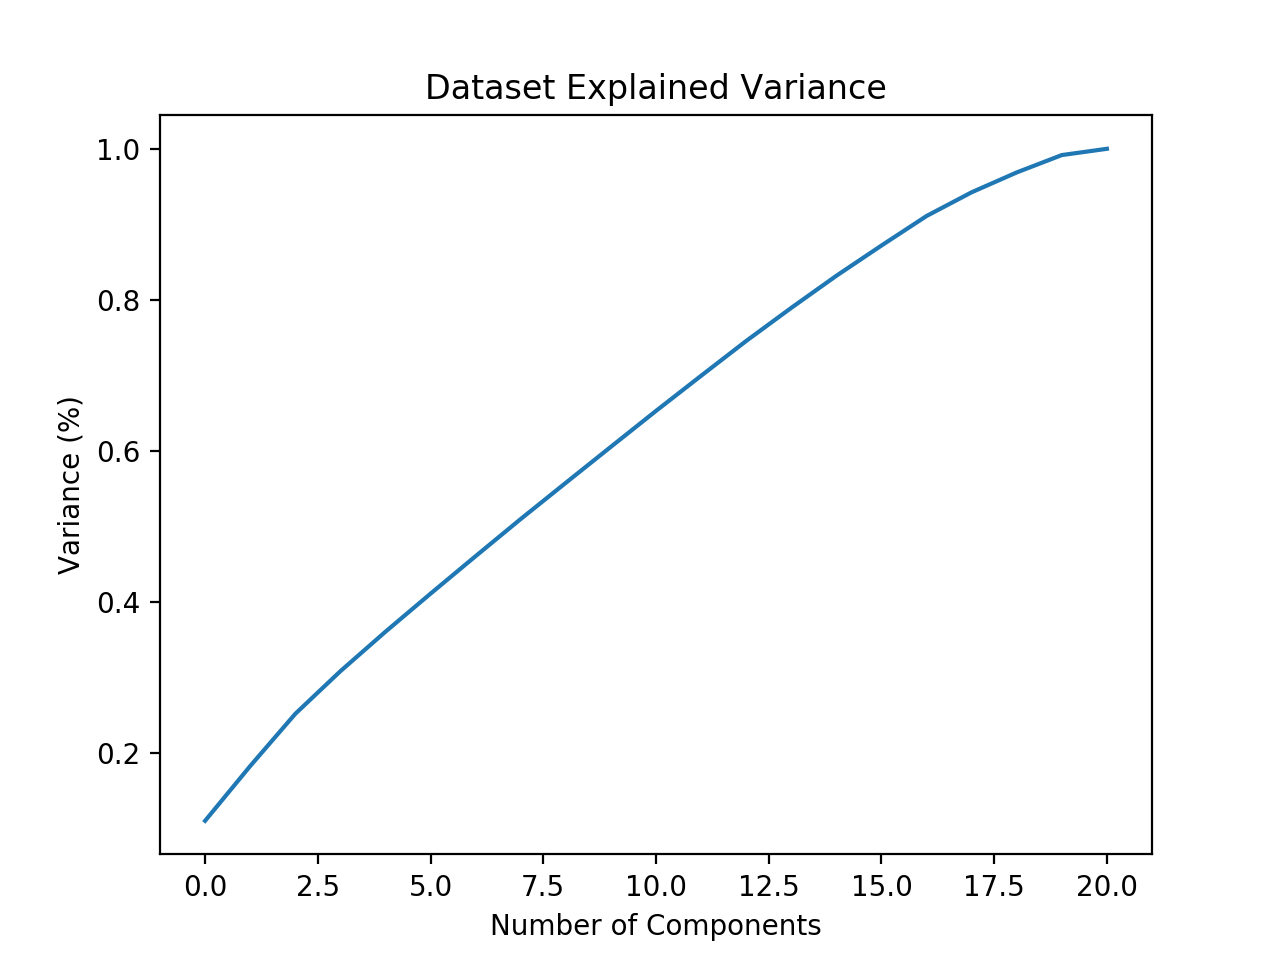

Text(0.5,1,'Dataset Explained Variance')

In [58]:
# Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')

In [59]:
pca = PCA(n_components=18)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
#Df = pd.DataFrame(principalComponents[:,:18])


finalDf = pd.concat([data['Response'], principalDf], axis = 1)

In [60]:
finalDf.head()

,Response,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,-0.427897,-0.819156,0.989943,0.206621,-0.400201,-0.648043,1.617259,1.704307,-2.616207,0.009581,-1.329862,-1.287892,-0.205804,0.247143,-0.445947,-0.106676,-0.094098,-0.504375
1,0,2.080898,-1.559697,-0.662688,-0.495082,-1.197552,0.042015,-0.136502,-0.887277,-0.870789,0.324897,0.256470,-0.437507,0.718954,0.835312,1.806060,-1.180827,0.315804,-0.831986
2,0,1.376268,1.022496,-0.780305,-0.168199,-0.217519,0.926452,0.969165,0.668921,-1.950105,-0.632986,-0.706074,0.521505,-1.139956,0.854473,-0.645639,-0.730078,0.024325,0.791466
3,0,1.466007,-0.749026,0.782564,-0.407499,-1.068357,-0.496042,-0.064619,-1.254068,1.538227,-0.728230,-0.147500,0.088064,0.809206,-0.323135,-0.559551,-0.565183,-0.254997,0.130966
4,0,-1.482540,-0.452445,0.079267,-0.076306,-0.405238,0.514094,0.882523,1.638696,-1.550446,-1.766139,0.422121,-1.472663,0.305328,0.542530,-0.590111,0.671491,-0.181162,-0.020160


**PCA did not imporve the accuracy here**

In [61]:
from sklearn.tree import DecisionTreeClassifier


y = finalDf['Response'] 
X = finalDf.drop(['Response'], axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)



dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
dtree.tree_.impurity #keeps the gini values of the tree

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('\nconfusion_matrix:')
print(confusion_matrix(y_test,y_pred))


confusion_matrix:
[[1472   85]
 [  59  211]]
